# K-means Kümeleme Algoritması

K-means kümeleme yöntemi N adet veri nesnesinden oluşan bir veri kümesini giriş parametresi olarak verilen K adet kümeye bölümlemektir. Amaç, gerçekleştirilen bölümleme işlemi sonunda elde edilen kümelerin, küme içi benzerliklerinin maksimum ve kümeler arası benzerliklerinin ise minimum olmasını sağlamaktır.

K-means en sık kullanılan kümeleme algoritmalarındandır. Uygulanması kolaydır. Büyük ölçekli verileri hızlı ve etkin şekilde kümeleyebilir. “K” algoritmaya başlamadan önce ihtiyaç duyulan sabit küme sayısını ifade etmektedir. Tekrarlı bölümleyici yapısı ile K-means algoritması, her verinin ait olduğu kümeye olan uzaklıkları toplamını küçültmektedir. K-means algoritması karesel hatayı en küçük yapacak olan K adet kümeyi tespit etmeye çalışmaktadır.
 
K-means algoritmasının çalışma mekanizmasına göre öncelikle her kümenin merkez noktasını veya ortalamasını temsil etmek üzere K adet nesne rastgele seçilir. Kalan diğer nesneler, kümelerin ortalama değerlerine olan uzaklıkları dikkate alınarak en benzer oldukları kümelere dahil edilir. Daha sonra, her bir kümenin ortalama değeri hesaplanarak yeni küme merkezleri belirlenir ve tekrar nesnelerin merkeze uzaklıkları incelenir. Herhangi bir değişim olmayana kadar algoritma tekrarlamaya devam eder.

Algoritma temel olarak 4 aşamadan oluşur:
1.Küme merkezlerinin belirlenmesi
2.Merkez dışındaki verilerin mesafelerine göre kümelendirilmesi
3.Yapılan kümelendirmeye göre yeni merkezlerin belirlenmesi (veya eski merkezlerin yeni merkeze kaydırılması)
4.Kararlı hale (stable state) gelinene kadar 2. ve 3. adımların tekrarlanması


###### Kaynakça

- Zaki, Mohammed J.  ve Meira Wagner Jr., Data Mining And Analysis, New York: Cambridge University Press, 2014. (Part Three: Clustering, Representative-based Clustering, K-means Algorithm)
- https://makineogrenimi.wordpress.com/2017/06/23/gozetimsiz-ogrenme-k-merkezli-obekleme/

Elimizdeki verilerle ülkelerin mutluluk seviyelerini tahmin etmek onları gruplandırmak istiyoruz. 

İlk olarak kütüphanelerimizi ekleyelim.

- **numpy (Numeric-Python) :** Python ile bilimsel bazlı hesaplama yapabilme yeteneği olan bir kütüphanedir. NumPy sayesinde python dili ile diziler ve matrislerde işlemler kolayca yapılabilmektedir.Ayrıca kütüphanede özellik olarak N-Boyutlu dizi nesenelerinde işlem yapabilme, kütüphanenin kendisine özgü olarak özelleşmiş fonksiyonları barındırma (Fourier dönüşümleri, lineer cebir işlemleri, düzgün biçimli rastgele sayı dağılımları, düzgün biçimli olmayan sayı dağılımları vb.), C/C++ ve Fortran kodları ile tümleşik çalışabilme gibi yetenekler bulunmaktadır.
- **pandas (Python Data Analysis) :** Python için geliştirilen yüksek performanslı, kolay kullanımlı farklı veri yapılarını (.csv, .tsv, .xlsx vs..)  kullanabilmeye ve analiz edebilmeye yarayan bir kütüphanedir.
- **matplotlib (Mathematical Plotting Library) :** Temel olarak 2-boyutlu çizimler için geliştirilmiş bir kütüphanedir. Bu kütüphane ile temel çizimlerin haricinde histogramlar, güç-yoğunlukları, sütun grafikleri, dağılım modellemeleri vb. Işlemler çok kolay şekilde gerçekleştirilebilmektedir.
- **Sci-Kit Learn :** NumPy, SciPy lib ve matplotlib üzerine geliştirilmiş olan veri madenciliği ve veri analizi  için uygun notasyon ve algoritmaları barındıran bir kütüphanedir. İçerisinde sınıflandırma(Classification), regresyon(Regression), kümeleme(Clustering), boyutsal indirgeme(Dimensionality Reduction), model seçimi(Model Selection), ön işleme(Preprocessing) vb. Işlemler için uygun notasyon ve algoritmaları barındıran bir kütüphanedir.
- **math :** Matematiksel operatörleri gerçekleştirebilmek için kullanılır.
- **rcParams :** Varsayılan rc ayarlarını (renk, boyut, kalınlık vs) değiştirmek için kullanılır. 


###### Kaynakça
- https://docs.python.org/3/library/
- http://www.kodblog.net/2018/02/24/python-kutuphaneleri/

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import math
from pylab import rcParams
import seaborn as sns

Veri setini yükleyelim ve .head() yardımıyla başlıkları görüntüleyelim.

In [4]:
dataset=pd.read_csv(r"C:\Python37\2017.csv")
dataset.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Veri setimizde yer almasını istemediğimiz alanları (Country,Happiness.Rank,	Happiness.Score, Whisker.high, Whisker.low, Dystopia.Residual) çıkaralım.

Bunun için .iloc kullanarak sadece istediğimiz kolonlara yer verecek şekilde veri setimizi güncelleyelim.

dataset1 ve dataset2 olmak üzere iki farklı değişken tanımlayalım. dataset1'de sadece sayısal değerlerimiz olsun ve analizimizi etkileyecek sütunları çıkaralım. Yani bunun için yukarıda istemediğimiz alanlar diye belirlediğimiz alanları çıkaralım.

dataset2'de ise çalışmamızın belli bir aşamasında ülke isimlerine ihtiyacımız olacağından dataset1'den farklı olarak Country sütununa yer verelim, Happiness.Rank, Happiness.Score, Whisker.high,	Whisker.low Dystopia.Residual sütunlarına yer vermeyelim.

In [5]:
columns1=[*range(5,11)]
columns2=[0,*range(5,11)]
dataset1=dataset.iloc[:,columns1].values
dataset2=dataset.iloc[:,columns2]
dataset3=dataset.iloc[:,columns1]

In [6]:
dataset2.head()

,Country,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.
0,Norway,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


Veri setimizin içeriğini, detaylarını göstermek için describe ile kolon bazlı detaylandıralım. .describe() veri setinin merkezi eğilimini, dağılımını ve şeklini özetleyen tanımlayıcı istatistikler üretir.

In [7]:
dataset.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


Böylece veri setimizdeki her bir kolonun kaç veriden oluştuğunu, ortalama değerini, standart sapmasını, minimum, maksimum ve ara değerlerini görebliyoruz. Tüm kolonlar 155 satırdan oluşuyor. Her bir kolondaki verilerin minimum ve maksimum değerleri açıklığı dolayısıyla  ortalamayı ve standart sapmayı etkiler. Verilerimizin açıklığı (max değer - min değer) yüksekte standart sapmamız da yüksek olacaktır ve bu aynı zamanda ortalamanın da veri setindeki değerleri tam yansıtmadığı anlamına gelir. Fakat standart sapma düşükse ortalama bize veride yer alan değerler hakkında daha doğru bir yorum yapmamızı sağlayacaktır.

#### Kümeler İçi Kareler Toplamı
İdeal kümeleme sayısını 'Kümeler İçi Kareler Toplamı (Within Clusters Sum of Square (WCSS))' ile belirleyebiliriz.
Bu algoritma çalıştığında her bir noktayı bir kümeye yerleştirir. Ve her bir noktanın küme merkezine olan uzaklığının kareleri toplamını hesaplar. Bunu sum of squared error (SSE)  olarak adlandırırız. k arttıkça hata azalır. Amaç SSE nin aniden değiştiği yerlerdeki k değerlerini kestirebilmektir.

Kareler toplamının en az olduğu yer bize kümenin merkezi ile küme içerisinde yer alan noktaların birbirlerine ne kadar yakın olduğunu söyler. Burada asıl amaç küme sayısını belirlemektir.

Yukarıdaki algoritmada; farklı k değerleri için veri setimizi kümelere ayırıp her k değerine karşılık gelen kümeler içi kareler toplamını hesaplıyoruz. istenilen durumun wcss değerinin minimum olmasından bahsetmiştik.

$$ WCSS=\sum_{P_iKüme_1} mesafe(P_i,C_1)^2 + \sum_{P_iKüme_2} mesafe(P_i,C_2)^2 + ...  $$

### Kümeler İçi Kareler Toplamı Yöntemi

Verilerimizi k kümeye ayırmak istiyoruz. Bunun için k tane küme merkezi belirlemeliyiz. k'nın kaç olacağına ve küme merkezlerinin nerelerde bulunacağına karar vermeliyiz.

Küme merkezlerini belirlemek için, her bir kümenin ortalama noktasını bulup küme merkezini buraya yerleştireceğiz. Her bir nokta kendisine en yakın küme merkezi ile eşleşmelidir.

İlk olarak küme merkezleri rastgele olarak yerleştirilir. Daha sonra, elimizdeki her veri noktasının küme merkezlerine olan uzaklıkları hesaplanır ve veri noktası en yakın küme ile eşleştirilir. Her bir küme merkezi için de, kümelerin ortalaması hesaplanır ve küme merkezi o noktaya yerleştirilir. Bu işlemler, küme merkezleri sabit olana kadar devam ettirilir.

k sayısını belirlemek için en yaygın kullanılan yöntem kümeler içi kareler toplamı metodudur. Bu metodda k değerleri (örneğin, k= 2, 4, 6, 8) için aşağıdaki formül hesaplanır ve k’ya göre grafiği çizilir.

- Boş bir liste oluşturup bu listeye for döngüsünde her bir küme sayısı içi WCSS değerlerini ekledik.

- For döngüsü içinde yer alan, import ettiğimiz Kmeans sınıfından kmeans adında bir nesne oluşturuyoruz. Nesne oluştururken yapıcı fonksiyona (__init__) bazı parametreler gönderiyoruz. Bunlardan ilki küme sayısı  olan n_clusters. for döngüsü i değişkeniyle her dönüşünde bir artarak küme sayısını parametre olarak n_clusters’a veriyor. init parametresi ise başlangıç noktalarını seçmek için ideal küme merkezlerini belirliyor.

- kmeans++ parametresi iyi başlangıç noktaları seçmemizi sağlıyor. k-means++ chooses initial centers in a way that gives a provable upper bound on the WCSS objective.

- n_init ise küme merkezi başlangıç noktasının kaç farklı noktadan başlayabileceğini belirler.


- Son parametre random_state, bu işlemleri uygulayan herkesin aynı sonuçları elde etmesini sağlar. 

- Nesne oluştuktan sonra fit() metodu ile nesne ile veri uyumunu gerçekleştiririz. Parametre olarak daha önce oluşturduğumuz dataset1’i veriyoruz. 

- for döngüsünden önce oluşturduğumuz wcss listesine kmeans nesnesinin inerita_ özelliğini ekliyoruz.

- inertia_ : Sum of squared distances of samples to their closest cluster center.
- append: Listenin sonuna öğe ekler 


###### Kaynakça
- https://www.youtube.com/watch?v=6A5EpqqDOdk
- http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/
- http://www.datascience.istanbul/2017/08/04/kumeleme-notlari-3-k-ortalamalar-kume-sayisini-belirleme/



#### İki K-Means Karşılaştırmasından Hangisini Seçerim?

$C_1,C_2,....C_K$ kümeleri temsil etsin. Veri setimizdeki her bir veri bu kümelerden birine dahil olsun ve bir kümede bulunan veri diğerinde bulunmasın.

İyi bir kümeleme within-cluster değişkeninin mümkün olabildiğince küçük seçilmesiyle sağlanır.  $C_k$ kümesi için kümelerin birbirlerinden farkının ölçüsü $W(C_k)$ within-cluster değişkenidir. Bu durumda amacımız;

$$\underset{C_1,C_2,...,C_k}{minimize} {\sum^K_{k=1}    W(C_k)}$$

Yukarıdaki formülden veri setimizi K kümeye ayıracağımızı ve K küme üzerinde within-cluster toplamının mümkün olabildiğince küçük seçileceğini anlayabiliiz.

within-cluster değişkenini tanımlamak için squared Euclidean distancetan yararlanalım.

$$W(C_k)=\dfrac{1}{|C_k|} \sum_{i,i∈C_k}\sum^P_{j=1}(x_{ij} − x_{ij} )^2  $$

$|C_k|$: k. kümedeki veri sayısı

k. küme için within-cluster değişkeni, k. kümedeki verilerin tüm ikili squared Euclidean distances toplamınin k. kümedeki toplam veri sayısına bölümüdür.

Bu iki formülü bir araya getirirsek: 

$$\underset{C_1,C_2,...,C_k}{minimize} {\sum^K_{k=1}  \dfrac{1}{|C_k|} \sum_{i,i∈C_k}\sum^P_{j=1}(x_{ij} − x_{ij} )^2 }$$


###### Kaynakça

- Zaki, Mohammed J.  ve Meira Wagner Jr., Data Mining And Analysis, New York: Cambridge University Press, 2014.  (Part Three: Clustering, Representative-based Clustering, K-means Algorithm)
- James G., Witten D., Hastie T., Tibshirani R., An Introduction to Statistical Learning, Springer, 2013. (10.3 Clustering Methods, 10.3.1 K-Means Clustering)

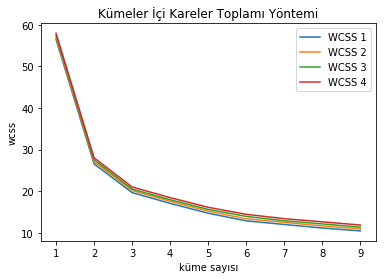

In [8]:
wcss1=[] 
wcss2=[]
wcss3=[]
wcss4=[]
for i in range (1,10):
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init=i, random_state=1)
    kmeans.fit(dataset1)
    wcss1.append(kmeans.inertia_)
    
for i in range (1,10):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=150, n_init=i, random_state=1)
    kmeans.fit(dataset1)
    wcss2.append(0.5+kmeans.inertia_)

for i in range (1,10):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=150, n_init=i, random_state=0)
    kmeans.fit(dataset1)
    wcss3.append(1+kmeans.inertia_)
    
for i in range (1,10):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=i, random_state=0)
    kmeans.fit(dataset1)
    wcss4.append(1.5+kmeans.inertia_)
    
fig1,=plt.plot(range(1,10),wcss1, label='WCSS 1')
fig2,=plt.plot(range(1,10),wcss2, label='WCSS 2')
fig3,=plt.plot(range(1,10),wcss3, label='WCSS 3')
fig4,=plt.plot(range(1,10),wcss4, label='WCSS 4')

plt.title('Kümeler İçi Kareler Toplamı Yöntemi')
plt.xlabel('küme sayısı')
plt.ylabel('wcss')
plt.legend(handles=[fig1,fig2,fig3,fig4])
plt.show()

##### range ( , )

Ne kadar çok k değeri seçersek wcss değerleri o kadar azalır. Bu durumda 155 ülke için 155 küme merkezi seçtiğimizde datamızdaki tüm noktalarla bire bir eşleşen küme merkezlerimiz olur. Fakat küme merkezi sayısının çoğalması yapmak istediğimiz çalışmayla ters düşer. İstediğimiz optimal sayıda kümeye ayırmak. 

Grafikten yorumlayabileceğimiz üzere küme merkezi sayısı 3 olana kadar wcss değerleri hızla artıyor, fakat 3'ten büyük değerler için küme sayımız ne kadar artarsa artsın wcss'de büyük değişimler olmuyor. Bu nedenle küme sayısını 3 olarak belirlemek veri setimiz için uygun olacaktır.

##### random_state 

random_state'i sabitlyerek, kodumuzu her çalıştırdığımızda her seferinde aynı rastgele tamsayı dizisini oluşturmasını sağlarız. random_state'i sabitlemek verilerimizin örneklenme şeklini etkiler, dağılımını etkilemez. Tutarlı sonuçlar elde etmemizi sağlayan bir parametredir. 

- Aşağıda wcss2'de random_state=1, wcss3'te random_state=0 olsun. Grafik üzerinde farklılıkları inceleyelim.

##### max_iter

Bir sonraki parametre max_iter algoritmanın nihai durumuna erişmesi için en fazla kaç iterasyon yapabileceğini belirler, varsayılan 300’tür.

- Şimdi, wcss1'de max_iter parametresine yer vermeleylim. wcss2 için 150, wcss3 için 300 alalım max_iter değerini.


###### Kaynakça
- https://matplotlib.org/users/pyplot_tutorial.html
- https://www.quora.com/How-can-we-choose-a-good-K-for-K-means-clustering

### Grafik Yorumu

4 adet wcss listesi oluşturduk. Burada amacımız random_state ve max_iter'deki sayısal değişikliklerin kümeleme algoritmamızı nasıl etkileceğini görmek. Bunun için parametrelerimizde küçük değişikliklerle oluşturduğumuz wcss değerlerimizi 0.5 birim aralıklarla grafiklerini çizdirip karşılaştırmayı amaçlıyoruz.

Öncelikle wcss2 ve wcss3 ile random_state parametresinde yapılan değişikliklerin etkilerini gözlemlemek istedik. wcss2'de random_state=1, wcss3'te ise 0. Grqafiğimizde WCSS 2 ve WCSS 3'e baktığımızda ve aralarında 0.5 birimlik farkı göz önüne bulundurduğumuzda bize aynı sonucu verdiklerini söylemek mümkün. Yani random_state'i kaç atarsak atayalım çalışmamızda bir değişikliğe sebep olmayacağı sonucuna varabiliriz. 

Şimdi wcss1, wcss3 ve wcss4'e bakalım. Burada wcss1'de  max_iter değeri yok, diğerlerinde sırasıyla 150 ve 300. Yine grafiğimizde WCSS 1, WCSS 3 ve WCSS 4 eğrilerimizi incelediğimizde bu eğrilerin bize aynı sonuçlarını verdiğini gözlemleyebiliriz. Yani max_iter değerini istediğimiz gibi seçebiliriz.

Yukarıda çizdiğimiz grafiğe geri dönecek olursak küme sayısı 3 olana kadar wcss değerleri çok hızlı bir şekilde düşüyor. Optimal küme sayısını belirleyebilmek için wcss değerinin minimum olduğu değere karşılık gelen küme sayısını almalıyız. Grafiğimizde küme sayısı 2 ve 3 değerleri için dirsek oluşuyor. wcss değeri 3 için daha az olduğundan k değerini 3 olarak belirleyelim.

Şimdi, veri setimizi yukarıda elde ettiğimiz bilgiler ve değerler doğrultusunda KMeans ile modelleyelim. fit_predict kullanarak dataset1'de yer alan her örnek için küme merkezlerini hesaplayıp küme indislerini tahmin edelim.

In [9]:
dataset2.head()

,Country,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.
0,Norway,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [10]:
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(dataset1)

3 kümeye ayırdığımız 155 farklı ülke modelinin grafiğini çizdirelim. Bunu yaparken noktalarımızın büyüklüğünü mutluluklarıyla ilişkilendirelim. Bunun için Happ. Score kolonuna karşılık gelen size değişkenini oluşturmalıyız.

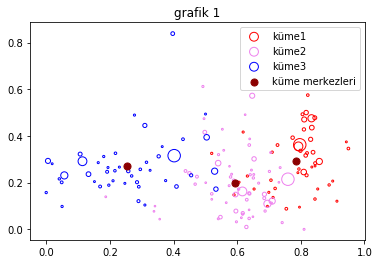

In [11]:
size=155/dataset.iloc[:,1]

plt.scatter(dataset1[y_kmeans == 0, 2], dataset1[y_kmeans == 0, 4], s = size, facecolors='none', edgecolors='red', linewidth='1', label = 'küme1')
plt.scatter(dataset1[y_kmeans == 1, 2], dataset1[y_kmeans == 1, 4], s = size, facecolors='none', edgecolors='violet', linewidth='1', label = 'küme2')
plt.scatter(dataset1[y_kmeans == 2, 2], dataset1[y_kmeans == 2, 4], s = size, facecolors='none', edgecolors='blue', linewidth='1', label = 'küme3')

plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,4], s=50, c='darkred', label='küme merkezleri')

plt.title('grafik 1')
plt.legend()
plt.show()

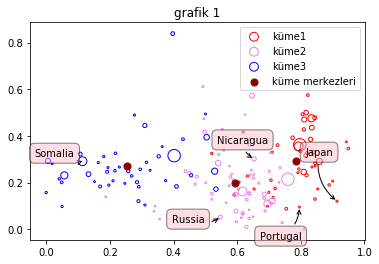

In [12]:
from random import *
import random

size=155/dataset.iloc[:,1]

plt.scatter(dataset1[y_kmeans == 0, 2], dataset1[y_kmeans == 0, 4], s = size, facecolors='none', edgecolors='red', linewidth='1', label = 'küme1')
plt.scatter(dataset1[y_kmeans == 1, 2], dataset1[y_kmeans == 1, 4], s = size, facecolors='none', edgecolors='violet', linewidth='1', label = 'küme2')
plt.scatter(dataset1[y_kmeans == 2, 2], dataset1[y_kmeans == 2, 4], s = size, facecolors='none', edgecolors='blue', linewidth='1', label = 'küme3')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,4], s=50, c='darkred', label='küme merkezleri')

list=range(0,155)
s = sample(list, 5)
labels=dataset.iloc[s,0]

for label, x, y in zip(labels, dataset1[s, 2], dataset1[s, 4]):
    
    u=random.randint(-50,50)
    v=random.randint(-50,50)
    plt.annotate(
        label,
        xy=(x, y), xytext=(u,v),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='pink', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0.3'))
   
plt.title('grafik 1')
plt.legend()
plt.show()

###### Kaynakça

- https://mpld3.github.io/examples/scatter_tooltip.html 
- https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html       
- https://stackoverflow.com/questions/5147112/how-to-put-individual-tags-for-a-scatter-plot           
- https://plot.ly/python/line-and-scatter/              

Grafiğimizi oluşturduk. Bu grafikte ülke mutluluklarını tüm kolonları baz alarak gruplamak mümkün değil. Sadece seçtiğimiz bir kolona bağlı sonuçların grafiğini elde edebiliyoruz.
dataset1'de yer alan kolon başlıklarımız sırasıyla Economy..GDP.per.Capita., Family, Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption. Örnek olarak, yukarıda İkinci ve dördüncü kolonlara denk gelen Health..Life.Expectancy. ve Generosity verilerini baz alarak bir gruplama yapıldı. Fakat açıkca gözlenebileceği gibi farklı kümeleri temsil eden kırmızı, mavi ve mor renkleri birbirlerinin içine girmiş durumda. Düzgün bir gruplama olmadığı sonucuna varabiliriz.

İkinci ve dördüncü kolonlar yerine farklı kolonlar seçip grafiği tekrar tekrar çizdirebiliriz. Bizim amacımız dataset1'de yer verdiğimiz tüm kolonları kullanarak bir gruplama yapmak. Bu nedenle bu şekilde 2 kolon baz alarak çizdirdiğimiz grafik işimize yaramayacaktır.

Şimdi dataset1'de yer alan tüm kolonları yukarıdaki gibi ikili gruplayarak grafiklerini çizdirelim.


###### Kaynakça
- https://www.youtube.com/watch?v=MTrzkAinc98&list=PLv7Aer2xCx3d0aSlDJNp-lISDvmo_Eb5G

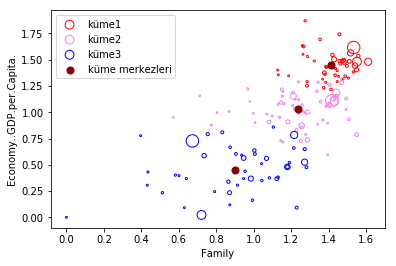

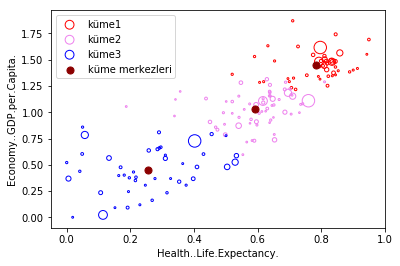

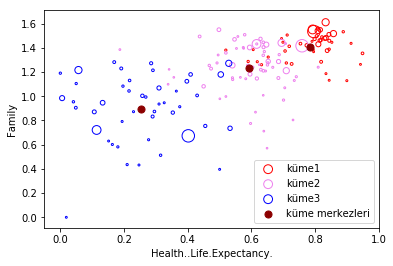

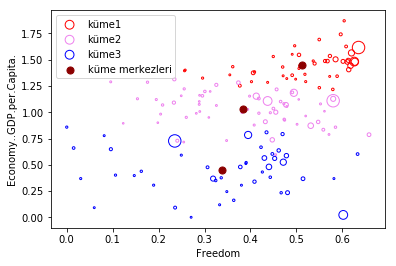

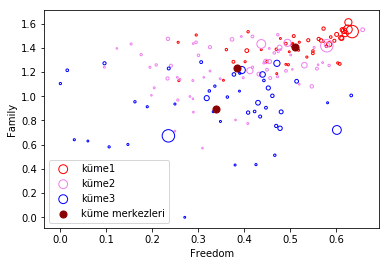

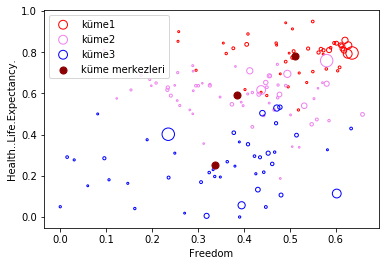

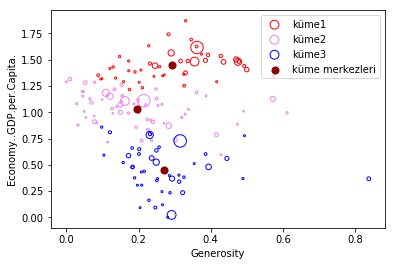

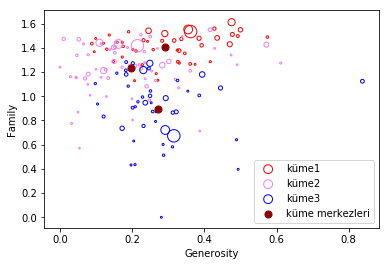

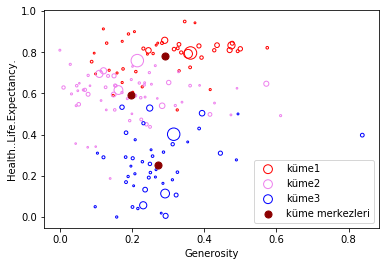

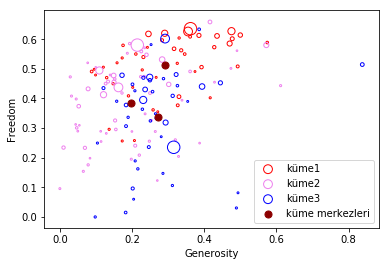

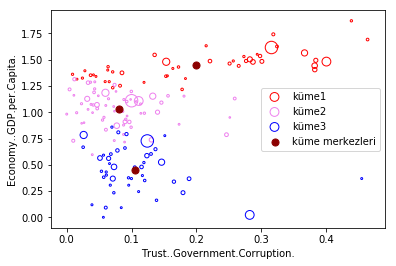

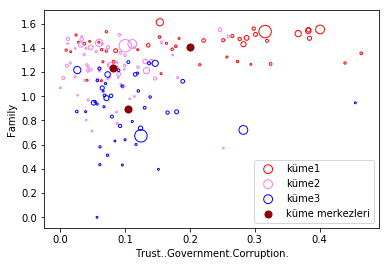

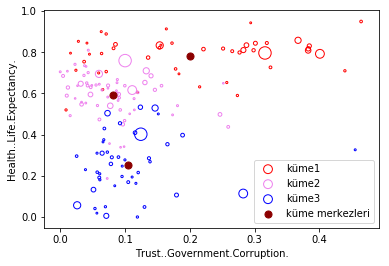

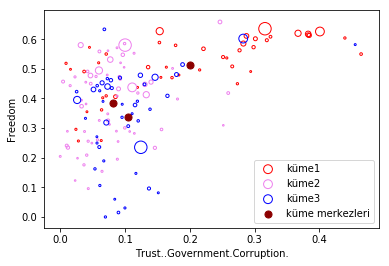

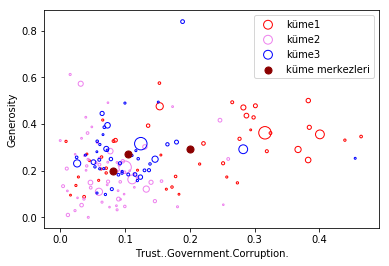

In [13]:
for i in range(0,6):
    for j in range(0,6):
        if (i==j): break
            
        else: 
                        
            plt.scatter(dataset1[y_kmeans == 0, i], dataset1[y_kmeans == 0, j], s = size, facecolors='none', edgecolors='red', linewidth='1', label = 'küme1')
            plt.scatter(dataset1[y_kmeans == 1, i], dataset1[y_kmeans == 1, j], s = size, facecolors='none', edgecolors='violet', linewidth='1', label = 'küme2')
            plt.scatter(dataset1[y_kmeans == 2, i], dataset1[y_kmeans == 2, j], s = size, facecolors='none', edgecolors='blue', linewidth='1', label = 'küme3')

            plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,j], s=50, c='darkred', label='küme merkezleri')
            plt.xlabel(dataset3.columns[i])
            plt.ylabel(dataset3.columns[j])
            plt.legend()
            plt.show()       

Tek tek grafiklerimizi inceleyip yorumlayalım:

- Economy - Family grafiğinde küme1 ve küme3 güzel bir şekilde ayrılmış fakat küme2'de yer alan değerlerimiz fazlasıyla küme1 ve küme3 arasına karışmış durumda. küme1 ve küme3 bize istediğimiz sonucu verirken küme2 nedeniyle homojen bir kümeleme işlemi yoktur. Bu durumda Economy ile Family kolonları arasında kuvvetli bir ilişki olduğunu söyleyemeyiz.

- Economy - Health grafiği bir önceki grafiğe göre daha homojen. Economy ekseninden Health eksenine paralel hayali çizgilerle farklı renklerdeki noktalarımızı tamamen homojen olmasa da kabul edilebilir seviyede birbirlerinden ayırabiliriz. Yani Health eksenine paralel çizgilerle grafiğimizi 3 parçaya bölüp, her bir aralıkta tek renk noktaları (küçük hata payı ile) kümelemiş oluruz. Bu bize Economy ile Health kolonları arasında kuvvetli bir ilişki olduğunu gösterir.

- Family - Health grafiğinde küme1 ve küme3 güzel bir şekilde ayrılmış fakat küme2'de yer alan değerlerimiz fazlasıyla küme1 ve küme3 arasına karışmış durumda. küme1 ve küme3 bize istediğimiz sonucu verirken küme2 nedeniyle homojen bir kümeleme işlemi yoktur.  Bu durumda Family ile Health kolonları arasında kuvvetli bir ilişki olduğunu söyleyemeyiz.

- Economy - Freedom grafiği yine bir önceki grafiğe göre daha homojen. Economy ekseninden Freedom eksenine paralel hayali çizgilerle farklı renklerdeki noktalarımızı tamamen homojen olmasa da kabul edilebilir seviyede birbirlerinden ayırabiliriz. Yani Freedom eksenine paralel çizgilerle grafiğimizi 3 parçaya bölüp, her bir aralıkta tek renk noktaları (küçük hata payı ile) kümelemiş oluruz. Bu bize Economy ile Freedom kolonları arasında kuvvetli bir ilişki olduğunu gösterir.

- Family - Freedom grafiğinde küme1, küme2 ve küme3 tamamen birbirleriyle iç içe. girmiş. Önceki grafiklere göre en homojen olmayan grafiğimiz. Kırmızı noktalar morlerin arasına, morler mavilerin arasına dağılmış durumda. Family ile Freedom kolonları arasında bir ilişki yoktur.

- Economy - Generosity grafiğinde küme1 ve küme3 güzel bir şekilde ayrılmış fakat çok olmasa da küme2'de yer alan değerlerimiz küme1 ve küme3 arasına karışmış durumda. Generosity eksenine çektiğimiz paralellerle mor noktaları kırmızı ve mavi noktalardan tamamen ayırmamız imkansız. Çok homojen bir ayrım olmasa da Economy - Generosity kolonları arasında bir ilişki olduğunu söylemek mümkün.

- Family - Generosity grafiğinden kolonlar arasında bir ilişki olmadığı yorumunu yapabiliriz. Gerekçe olarak kırmızı, mor ve mavi noktalarımızı her yerde kesinlikle homojen olmayan bir şekilde görmemizi öne sürebiliriz. Homojen bir kümeleme olmadığından Family ile Generosity kolonları arasında bir ilişki yoktur.

- Health - Generosity grafiğinde küme1 ve küme3 güzel bir şekilde ayrılmış fakat küme2'de yer alan değerlerimiz fazlasıyla küme1 ve küme3 arasına karışmış durumda. küme1 ve küme3 bize istediğimiz sonucu verirken küme2 nedeniyle homojen bir kümeleme işlemi yoktur.  Bu durumda Generosity ile Health kolonları arasında kuvvetli bir ilişki olduğunu söyleyemeyiz.

- Freedom - Generosity grafiğinden kolonlar arasında bir ilişki olmadığı yorumunu yapabiliriz. Gerekçe olarak kırmızı, mor ve mavi noktalarımızı her yerde kesinlikle homojen olmayan bir şekilde görmemizi öne sürebiliriz. Homojen bir kümeleme olmadığından Fredom ile Generosity kolonları arasında bir ilişki yoktur.

- Economy - Trust grafiği bir önceki grafiğe göre daha homojen. Trust eksenine paralel hayali çizgilerle farklı renklerdeki noktalarımızı tamamen homojen olmasa da kabul edilebilir seviyede birbirlerinden ayırabiliriz. Yani Trust eksenine paralel çizgilerle grafiğimizi 3 parçaya bölüp, her bir aralıkta tek renk noktaları (küçük hata payı ile) kümelemiş oluruz. Bu bize Economy ile Trust kolonları arasında kuvvetli bir ilişki olduğunu gösterir.

- Family - Trust grafiğinde küme1, küme2 ve küme3 değerleri birbirlerine karışmış durumda. Hayali çizgiler ile farklı renkleri birbirlerinden ayırmak mümkün değil. Homojen bir kümeleme işlemi yoktur.  Bu durumda Family ile Trust kolonları arasında kuvvetli bir ilişki olduğunu söyleyemeyiz.

- Health - Trust grafiği bir önceki grafiğe göre daha homojen. Trust eksenine paralel hayali çizgilerle farklı renklerdeki noktalarımızı tamamen homojen olmasa da kabul edilebilir seviyede birbirlerinden ayırabiliriz. Yani Trust eksenine paralel çizgilerle grafiğimizi 3 parçaya bölüp, her bir aralıkta tek renk noktaları (küçük hata payı ile) kümelemiş oluruz. Bu bize Health ile Trust kolonları arasında kuvvetli bir ilişki olduğunu gösterir.

- Freedom - Trust grafiğinde küme1, küme2 ve küme3 değerleri birbirlerine karışmış durumda. Hayali çizgiler ile farklı renkleri birbirlerinden ayırmak mümkün değil. Homojen bir kümeleme işlemi yoktur.  Bu durumda Freedom ile Trust kolonları arasında kuvvetli bir ilişki olduğunu söyleyemeyiz.

- Generosity - Trust grafiğinde küme1 ve küme3 kısmen daha güzel bir şekilde ayrılmış fakat yine de kırmızı noktalar mavi ve morlerin arasında görülüyor. Diğer yandan mavi ve mor noktalar arasında hiç bir ayrım yok. Bu durumda Generosity ile Trust kolonları arasında ilişki olduğunu söyleyemeyiz.

Tüm incelemelerimi göz önünde bulundurarak Economy ve Health kolonlarının baskın olduğunu, Generosity ve Trust kolonlarının kümeleme işleminde kayda değer bir baskınlığının olmadığı sonucunu çıkarıyoruz.


###### Kaynakça

- https://www.digitalocean.com/community/tutorials/how-to-construct-for-loops-in-python-3
- https://www.quora.com/What-are-the-best-examples-of-a-Nested-Loops-for-Python
- https://www.tutorialspoint.com/python/python_nested_loops.htm
- https://stackoverflow.com/questions/22007492/prime-number-python-nested-loops
- https://stackoverflow.com/questions/41065354/break-for-loop-in-an-if-statement

İkili kolonlar bazında grafik yorumu yapmak bizi doğru yönlendirmeyeceğinden yani tüm kolonları baz alarak bir sonuca varmak istediğimizden veri setimizdeki 155 ülkeyi farklı bir yöntemle 3 kümeye ayırmayı deneyelim. 

In [14]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(dataset1)
labels_rakam = kmeans.labels_
labels_rakam

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

Kümeler 0, 1, 2 ile temsil ediliyor. Veri setimizde mutluluk seviyelerine göre listelenmiş ülkelerin sırasını hiç değiştirmediğimizden idealde 155 ülkeyi sırayla mutlu, ne mutlu ne mutsuz, mutsuz olarak görmeyi bekleriz. Örnek vermek gerekirse veri setimizi mutluluk skorlarına göre gruplandırdığımızda ilk 50 ülke mutlu, son 50 ülke mutsuz, arada kalanlar ise ne mutlu ne mutsuz sınıfında yer almalı gibi bir aralık belirleyip çıkarımda bulunabiliriz. Bu nedenle 0'ların (mutlu) arasına karışmış 1'ler, benzer şekilde 2'ler arasında 0'lar görmek modelimizle veri setimizin tamamen örtüşmediğini göstermekte. 0, 1, 2 değerlerini yani ülkelerin mutluluk kategorilerini homojen olarak, bu rakamları birbirlerinin içine geçmemiş bir şekilde görmeyi amaçlıyoruz. Yukarıda kullandığımız yöntem de bizi istediğimiz sonucu göstermemekte. Yukarıdaki değerlere bakarak evet bir ilişki var ama kümeleme algoritmamız homojen bir çıktı vermiyor sonucuna ulaşıyoruz.

Önce grafik kullanarak oluşturduğumuz üç kümeyi gözlemlemek istedik fakat istediğimiz gibi tüm kolonları kullanamadık. Şimdi ise tüm kolonları dahil etmemize rağmen yukarıdaki algoritma ile  kümeleme sonucumuz ikna edici olmadı.

Yukarıdaki 0, 1, 2 değerlerini bir de grafik üzerinde görelim.


###### Kaynakça
- https://plot.ly/python/candlestick-charts/

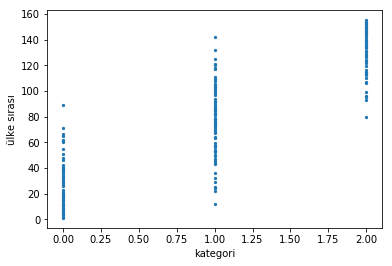

In [15]:
happscore=dataset.iloc[:,1].values
plt.scatter(labels_rakam, happscore, s = 5)
plt.figure(1, figsize=(5, 3))
plt.xlabel('kategori')
plt.ylabel('ülke sırası')
plt.show()

Yukarıda elde ettiğimiz 0,1,2 kümeleri ile veri setimizde yer alan ülkelerin mutluluk sılarının grafiğini çizdirdik. 0 ve 2 kümeleri 1'e nispeten daha doğru sonuçlar vermekte. Bazı sapmalar olmasına rağmen çoğunlukla 0-70 aralığındaki ülkelerin 0 kümesinde, 100-155'in 2 kümesinde yer aldığını görüyoruz. Fakat 1 kümesinde  10-140 sıralamasındaki ülkeler yer alıyor. Bu denli geniş bir aralık bizi yanıltacaktır. Kümeleme algoritmamız 0 ve 2 gruplamasında doğru 1 için iyi çalışmadığını söyleyebiliriz.

Şimdiye kadar yaptıklarımız bizi net bir sonuca ulaştırmadığından farklı bir yöntem deneyeceğiz.

# Doğrusal Diskriminant Analizi (Linear Discriminant Analysis) 

Bu analiz ile mutluluk seviyelerine göre 3 kümeye ayırdığımız 155 ülkeye farklı bir açıdan bakmayı amaçlıyoruz. Öyle bir açıdan gruplanmış ülkelere bakacağız ki izdüşümleri gerçekten dataset1'de yer alan kolonlardaki değerlerin ülkelerin mutluluk gruplandırmasında ilişkisi var mı yok mu bize söylüyor olacak. Yani baktığımız açıdan, kolonlar ile mutluluk arasında bir ilişki varsa düzgün gruplandırılmış bir grafik görüyor olacağız. Düzgün gruplandırılmış ile anlatmak istediğimiz mutluluk seviyelerine göre ayırdığımız kümelerimizi temsil eden kırmızı, mavi, mor renklerin birbirlerinin içine geçmeden homojen bir şekilde gruplanmış olması.

Analizimizi gerçekleştirmek için LinearDiscriminantAnalysis fonksiyonunu kullanacağız. Öncelikle bu fonksiyonun nasıl çalıştığına, teorik kısmına kısaca değinelim.
İki veya daha fazla nesne veya olayı sınıflandıran veya ayıran özelliklerin doğrusal bir kombinasyonunu bulmak için istatistiksel bir yöntemdir.

Elde edilen kombinasyon, lineer bir sınıflandırıcı olarak veya daha sonraki sınıflandırma öncesi boyut küçültme için kullanılabilir.

LDA, diğer özelliklerin veya ölçümlerin doğrusal bir kombinasyonu olarak bir bağımlı değişkeni ifade etmeye çalışan varyans analizi (ANOVA) ve regresyon analizi ile yakından ilişkilidir.

#### LDA Yaklaşımı

Doğrusal diskriminant analizi yapmak için 5 genel adımı listeleyelim; 

1.Veri kümesinden farklı sınıflar için d boyutlu ortalama(mean) vektörleri hesaplanır.

2.Dağılım(scatter) matrislerini (in-between-class ve within-class scatter) hesaplanır.

3.Dağılım matrisleri için özvektörleri (*$ e_1 , e_2, ..., e_d $*) ve karşılık gelen özdeğerleri (*$\lambda_1 , \lambda_2, ... , \lambda_d$*) hesaplanır.

4.Özdeğerleri azaltarak özvektörleri sıralanır ve **d × k** boyutlu matris **W** (her sütunun bir özvektörü temsil ettiği) oluşturmak için en büyük özdeğerleri olan **k** özvektörlerini seçilir.

5.Örnekleri yeni alt uzay üzerine dönüştürmek için bu **d × k** özvektör matrisini kullanılır. Bu, matris çarpımı ile özetlenebilir: **Y = X × W** (burada **X**, n örneklerini temsil eden bir n × d boyutlu matrisidir ve y yeni uzayda dönüştürülmüş n × k boyutlu örneklerdir.)


LDA, iyi sınıf (hedefler) arasında en iyi şekilde ayıran değişkenleri lineer bir kombinasyonunu aramaya dayanır. Fisher aşağıdaki score fonksiyonunu tanımlar.

$Z=\beta_1 x_1 + \beta_2 x_2 + .... + \beta_d x_d $

$S(\beta)= \frac{\beta^T \mu_1 - \beta^T \mu_2 }{\beta^T C \beta} \hspace{1cm}$      *Score fonksiyonu*

$S(\beta)= \frac{\overline {Z_1} - \overline {Z_2 }}{Z'nin gruptaki varyansı}$ 

Score fonksiyonuna göre, problem score’u maksimize eden lineer katsayıları tahmin etmedir. Formülasyonu:

$\beta= C^{-1} (\mu_1 - \mu_2)  \hspace{1cm}$      *Model katsayıları*

$C= \frac{1}{n_1 + n_2}(n_1C_1+n_2C_2) \hspace{1cm}$      *Toplanmış kovaryans matrisi*





$ \beta  $: lineer model katsayıları  $\hspace{1cm}$
$ C_1,C_2 $ : kovaryans matrisi  $\hspace{1cm}$
$ \mu_1 , \mu_2 $ : ortalama vektörler 


En iyi diskriminantı belirleme yolu iki grup arasında Mahalanobis mesafesini hesaplamaktır. Mahalanobis mesafesinin üçten küçük olması yanlış sınıflandırma olasılığını oldukça küçük olduğunu anlamına gelir.



$ \Delta^2 = \beta^T (\mu_1 - \mu_2) $ 

$ \Delta$  : iki grup arası Mahalanobis farkı


Son olarak, eğer aşağıdaki şart sağlanırsa yeni gelen bir özellik sınıflandırılır.

$\beta^T =(x- ( \frac{ \mu_1 +  \mu_2 }{2} )) > log \frac{ p(c_1) }{p(c_2)} $



$ \beta^T  $: katsayı vektörü  $\hspace{1cm}$
x: veri vektörü

$ \frac{ \mu_1 +  \mu_2 }{2} $ : ortalama vektörü  $\hspace{1cm}$
$ log \frac{ p(c_1) }{p(c_2)} $ : sınıf olasılıkları



###### Kaynakça

- Zaki, Mohammed J. ve Meira Wagner Jr., Data Mining And Analysis, New York: Cambridge University Press, 2014. (Part Four: Classificatin, Linear Discriminant Analysis)
- http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
- http://sebastianraschka.com/Articles/2014_python_lda.html
- http://www.saedsayad.com/lda.htm

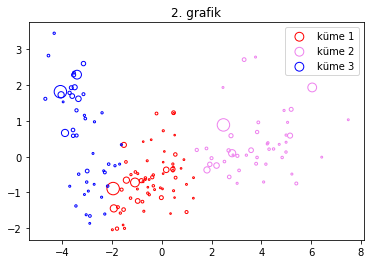

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

y = labels_rakam
X_norm = dataset1
lda = LinearDiscriminantAnalysis(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X_norm, y))

# Plot all three series
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], facecolors='none', edgecolors='red', linewidth='1', label='küme 1', s=size)
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], facecolors='none', edgecolors='violet', linewidth='1', label='küme 2', s=size )
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], facecolors='none', edgecolors='blue', linewidth='1', label='küme 3', s=size)

# Display legend and show plot
plt.legend()
plt.title('2. grafik')
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

Grafiğimizde mavi, kırmızı ve mor noktalar açıkça görüldüğü üzere birbirleri içine geçmeden, her renk kendi grubunu oluşturacak şekilde yer almaktadır. Doğrusal diskriminant analizi ile diğer yöntemler ile kesin sonuca varamadığımız kolonlar ve ülkelerin mutluluğu arasındaki ilişkinin varlığını göstermiş olduk.

Daha önceden oluşturduğumuz 1. grafik ile yukarıdaki 2. grafiği karşılaştıralım. 1. grafikte belirlediğimiz iki kolona göre kümeleme yapıyorduk, 2. grafikte ise tüm kolonlara göre kümeleme yapıyoruz. 1. grafikte homojen bir kümeleme sonucuna ulaşamamıştık, 2. grafikte ise kümeleme işlemi homojen bir şekilde gerçekleşti. 1. grafikte iki boyut üzerinde çalışıp izdüşümünü düzleme yansıttık, 2. grafikte tüm kolonları baz aldığımızdan daha çok boyutta çalışıp düzleme yansıttık. 2. grafikte 1. grafikte yer almayan farklı bir açıdan izdüşüm alma yöntemi sayesinde verilerimizi düzgün kümeleyecebileceğimizi gördük. 

LDA sonucunda çizdirdiğimiz grafik bize iyi bir sonuç verdi. Renklerin homojen bir şekilde birbirlerinden ayrıldıkları rahatça gözlemlenebilir. Buradan, k-means algoritmamızın iyi olduğu sonucuna varabiliriz. Yukarıda ikili kolonlar ilişikisini gösteren grafiklerde çok iyi sonuç alamamıştık, fakat LDA ile iyi sonuca vardığımızdan k-means'in de iyi olduğunu söyleyebiliriz.

## Spearmanr Korelasyonu - İki Değişken Arasındaki İlişki

Korelasyon analizi, iki değişken arasındaki ilişkiyi veya bir değişkenin iki veya daha çok değişken ile olan ilişkisini test etmek, varsa bu ilişkinin derecesini ölçmek için kullanılan istatistiksel bir yöntemdir.

Korelasyon analizinde amaç; bağımsız değişken (X) değiştiğinde, bağımlı değişkenin (Y) ne yönde değişeceğini görmektir.

Pearson korelasyonundan farklı olarak, Spearman korelasyonu her iki veri kümesinin normal olarak dağıldığını varsaymaz. Diğer korelasyon katsayıları gibi, bu da -1 ile +1 arasında değişir ve 0 ile korelasyon olmadığını gösterir. -1 veya +1 korelasyonları tam monotonik bir ilişkiyi ima eder. Olumlu korelasyonlar x'in arttığını, yani y olduğunu gösterir. Negatif korelasyonlar x arttıkça y azaldığını gösterir.

Korelasyon analizi sonucunda, doğrusal ilişki olup olmadığı, ve varsa bu ilişkinin derecesi korelasyon katsayısı ile hesaplanır. Korelasyon katsayısı 0-1 arası değerler alır.

Pozitif korelasyon: X değişkeninin değerinin artması(azalması) durumunda Y değişkeninin değerlerinin de artma(azalma) eğiliminde olduğu anlaşılır.
Negatif korelasyon: X değişkeninin değerinin artması (azalma) durumunda Y değişkeninin değerlerinin de azalma (artma) eğiliminde olduğu anlaşılır.


###### Kaynakça

- https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient
- http://benalexkeen.com/correlation-in-python/
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


## Pearson Korelasyonu

İki sayısal ölçüm arasında doğrusal bir ilişki olup olmadığını, varsa bu ilişkinin yönünü ve şiddetininin ne olduğunu belirlemek için kullanılan bir istatistiksel yöntemdir. Verilerin normal dağılıma sahip olması durumunda Pearson korelasyon katsayısı, verilerin normal dağılmadığı durumda ise Spearman Rank korelasyon katsayısı tercih edilir. Bir korelasyon katsayısının yorumlanabilmesi için p değerinin 0.05 den daha küçük olması gerekir. 

P değeri, en azından, bu veri kümelerinden hesaplanan kadar yüksek bir Spearman korelasyonuna sahip olan ilişkisiz bir sistem üreten veri kümesinin olasılığını kabaca belirtir. 

Korelasyon katsayısı negatif ise iki değişken arasında ters ilişki vardır, yani "değişkenlerden biri artarken diğeri azalmaktadır" denir. Korelasyon katsayısı pozitif ise "değişkenlerden biri artarken diğeride artmaktadır" yorumu yapılır. 


- 0,00 – 0,25 : Çok Zayıf
- 0,26 – 0,49 : Zayıf
- 0,50 – 0,69 : Orta
- 0,70 – 0,89 : Yüksek
- 0,90 – 1,00 : Çok Yüksek




İlgili kütüphane, fonksiyon ve modüllere göz atalım:

- **Series :** Tamsayılar, ondalıklı sayılar ve karakterler gibi herhangi bir veri türünü tutabilen tek boyutlu bir nesnedir.

- **DataFrame :** Potansiyel olarak farklı türlerdeki sütunlara sahip 2 boyutlu bir etiketli veri yapısıdır. Genellikle en çok kullanılan pandas nesnesidir. DataFrame de series gibi birçok farklı türde girişi kabul eder. Verilerin yanı sıra, isteğe bağlı olarak satır ve sütun argümanlarını eklemek ya da çıkartmak mümkündür.

- **spearmanr :** Spearman sıra sırası korelasyon katsayısını ve korelasyonu test etmek için p-değerini hesaplar. Spearman korelasyonu, iki veri kümesi arasındaki ilişkinin monotonikliğinin parametrik olmayan bir ölçümüdür. 

- **seaborn :** matplotlib'ye dayanan görselleştirme kütüphanesi. İstatistiksel grafikler çizmek için yüksek seviyeli bir arayüz sağlar.


###### Kaynakça

- https://pandas.pydata.org/pandas-docs/stable/dsintro.html
- https://medium.freecodecamp.org/series-and-dataframe-in-python-a800b098f68
- https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.spearmanr.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [17]:
from pandas import Series, DataFrame
from scipy.stats import spearmanr
import seaborn as sns

Sırada kolonlarımız ile Happiness.Score arasındaki ilişkiyi göstermek var. Bunun için spearmanr_coefficient fonksiyonunu kullanacağız. veri setimizdeki kullanacağımız kolonların tek tek kolonların Happiness.Score ile olan ilişkisini hesaplatacağız.

In [18]:
spearmanr_coefficient, p_value=spearmanr(dataset['Happiness.Score'], dataset['Economy..GDP.per.Capita.'])
print (("Spearmanr rank coefficient: Happiness Score & Economy = %0.3f") %(spearmanr_coefficient))

spearmanr_coefficient, p_value=spearmanr(dataset['Happiness.Score'], dataset['Family'])
print (("Spearmanr rank coefficient: Happiness Score & Family = %0.3f") %(spearmanr_coefficient))

spearmanr_coefficient, p_value=spearmanr(dataset['Happiness.Score'], dataset['Health..Life.Expectancy.'])
print (("Spearmanr rank coefficient: Happiness Score & Health = %0.3f") %(spearmanr_coefficient))

spearmanr_coefficient, p_value=spearmanr(dataset['Happiness.Score'], dataset['Freedom'])
print (("Spearmanr rank coefficient: Happiness Score & Freedom = %0.3f") %(spearmanr_coefficient))

spearmanr_coefficient, p_value=spearmanr(dataset['Happiness.Score'], dataset['Generosity'])
print (("Spearmanr rank coefficient: Happiness Score & Generosity = %0.3f") %(spearmanr_coefficient))

spearmanr_coefficient, p_value=spearmanr(dataset['Happiness.Score'], dataset['Trust..Government.Corruption.'])
print (("Spearmanr rank coefficient: Happiness Score & Trust = %0.3f") %(spearmanr_coefficient))

Spearmanr rank coefficient: Happiness Score & Economy = 0.825
Spearmanr rank coefficient: Happiness Score & Family = 0.774
Spearmanr rank coefficient: Happiness Score & Health = 0.788
Spearmanr rank coefficient: Happiness Score & Freedom = 0.556
Spearmanr rank coefficient: Happiness Score & Generosity = 0.136
Spearmanr rank coefficient: Happiness Score & Trust = 0.301


Satırlardaki sayısal değerler Happiness Score ile ilgili kolonlar arasındaki katsayıyı bize göstermekte. Bu değerlerin bize ne ifade ettiğinden bahsedelim. Değerler 1'e yaklaştıkça aralarındaki ilişki daha kuvvetli, 0'a yaklaştıkça ise daha zayıf olduğu anlamına gelmekte. O halde, en çok Economy ile Happiness Score arasında bir ilişki vardır. Yani Economy kolonu ne kadar yüksek değerler alırsa Happiness Score kolonu da o kadar yüksek değerler alacaktır. Bunun tam tersi de doğrudur. Economy değerleri düştükçe Happiness Score da düşecektir. Generosity ile Happiness Score arasında oldukça ters ilişki olduğunu söylebiliriz. Birinin artması diğerini azaltacak yani birbirlerini olumsuz etkileyen değerler. Kolonları Happiness Score ile olan ilişkilerine göre sıralayacak olursak ilk sırada Economy, sonra sırasıyla Health, Family, Freedom, Trust ve son olarak Generosity.

### Korelasyon Matrisi

İncelediğimiz 6 kolonun şimdi de Happiness Score yerine birbirleriyle olan ilişkilerini bir grafik üzerinde gösterelim.

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


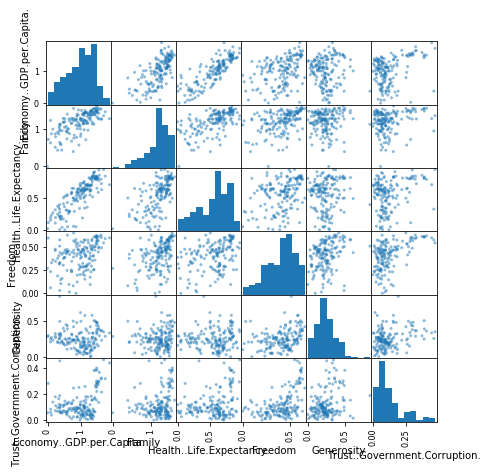

In [19]:
pd.scatter_matrix(dataset3, figsize=(7, 7))
plt.show()

Ve korelasyon matrisini de çizdirelim aynı kolonlar için. Amacımız kolonların birbirleriyle olan ilişkilerini gözlemlemek, mutluluk skorunu hangi alanların ne kadar etkilediğini incelemek ve bunlar doğrultusunda kolon sayısında azaltmaya gitmek.

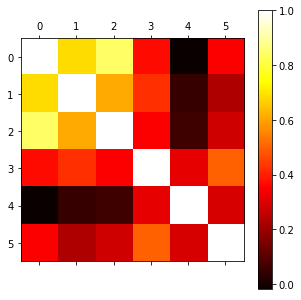

In [20]:
plt.matshow(DataFrame.corr(dataset3), cmap='hot')
plt.rcParams["figure.figsize"] = (5,5)
plt.colorbar() 
plt.show()

Öncelikle renkler ve kolon numaraları üzerinden değerlendirme yapacak olursak 0-1-2 kolonlarına karşılık gelen karelerin sarı-turuncu tonlarında olması bu kolonlar arasında daha sıcak bir ilişki olduğunu gösterir. Aynı şekilde 3-4-5 kolonları sarı-turuncuya nazaran daha koyu tonlarda olan turuncu - kırmızı renk aralığında olduğundan bu kolonlar arasında daha soğuk yani daha az ilişki olduğunu söyleyebiliriz. 4. kolonun diğer kolonlarla ilişkisi siyah renk tonlarında temsil ediliyor. 

Şimdi bir önceki görsel ile korelasyon matrisini birlikte yorumlayalım. Bu iki görsel bize aynı sonuçları farklı şekillerde sunmakta. Her ikisi de veri setimizde yer alan 6 kolonun her birinin diğerleriyle olan ilişkisini gösteriyor. Açıklayacak olursak, öncelikle iki şekil de köşegene göre simetrik. Yani üst üçgen ve alt üçgen bize aynı şeyleri anlatıyor. Tam köşegen üzerindeki alanlar aynı kolonların birbirleriyle olan ilişkisi. Örnek vermek gerekirse Economy kolonu ile Economy kolonu arasındaki ilişki. Haliyle çok yüksek seviyede bir ilişki olmasını bekleriz. Bu nedenle matrisimizde köşegen üzeri ilişkinin en yüksek olduğu 1 rakamını temsil eden beyaz renkte. Genel olarak baktığımızda Economy ve Family arasında, Economy ile Health..Life.Expectancy. arasında, Family ile Health..Life.Expectancy. arasında yüksek bir ilişki var olduğunu söyleyebiliriz. Fakat tam aksine Generosity kolonunun Economy..GDP.per.Capita., Family, Health..Life.Expectancy. ve Freedom kolonlarıyla arasında çok zayıf ilişki var. Bu da daha koyu renklerle gösteriliyor. Family ve Trust..Government.Corruption. arasında da zayıf ilişki var.

###### Kaynakça
- http://dataaspirant.com/2017/05/15/implement-multinomial-logistic-regression-python/
- https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

# Karar Ağacı (Decision Tree)

Karar ağaçları – sınıflama, özellik ve hedefe göre karar düğümleri (decision nodes) ve yaprak düğümlerinden (leaf nodes) oluşan ağaç yapısı formunda bir model oluşturan bir sınıflandırma yöntemidir. Karar ağacı algoritması, veri setini küçük ve hatta daha küçük parçalara bölerek geliştirilir. Bir karar düğümü bir veya birden fazla dallanma içerebilir. İlk düğüme kök düğüm (root node) denir. Bir karar ağacı hem kategorik hem de sayısal verilerden oluşabilir.

Karar ağacı, çok sayıda kayıt içeren bir veri kümesini, bir dizi karar kuralları uygulayarak daha küçük kümelere bölmek için kullanılan bir yapıdır

Karar ağacı öğrenme algoritmalarının avantajları arasında anlaşılması ve yorumlanmasının basit olması, çoğu alternatif tekniklere göre çok az bir işleme ile verinin kullanılabilir hale gelmesi, daha kısa ve basit olması, hem sayısal hem sınıfsal problemler için kullanılabiliyor olması, her adımın görüntülenip yorumlanabilmesi sayılabilir.

Kullanacağımız modülleri, kütüphaneleri tanıyalım:

- **os:** Hem Windows’ta, hem de GNU/Linux’ta çalışacak bir program yazılması gerektiğinde os modül sayesinde ortak bir arayüz üzerinden farklı işletim sistemleri ile tutarlı bir şekilde iletişim kurulmasını sağlayan fonksiyonlar ve nitelik sunar.
- **tree ve DecisionTreeClassifier:** Sınıflandırma ve regresyon için kullanılan parametrik olmayan denetimli öğrenme yöntemidir. Amaç, veri özelliklerinden çıkarılan basit karar kurallarını öğrenerek bir hedef değişkenin değerini tahmin eden bir model yaratmaktır.
- **train_test_split:** train ve test olarak ayrılmış veri seti kullanılır. Train seti bilinen çıktıları içerir ve model daha sonra diğer verilere genelleştirilmek için bu verileri kullanır. Modelin bu alt kümedeki tahminini test etmek için test veri kümesi kullanılır.
- **graphviz:** Grafik-çizim yazılımı için basit bir saf-Python arayüzü sağlar.
- **pydotplus:** Graphviz’in Dot diline bir Python arabirimi sağlayan eski pydot projesinin geliştirilmiş bir sürümüdür.
- **io:** Akış işlemine Python arabirimlerini sağlayan modüldür. Dosyalara ve akışlara erişmek için varsayılan arabirimdir.


###### Kaynakça
- http://scikit-learn.org/stable/modules/tree.html
- http://graphviz.readthedocs.io/en/stable/manual.html
- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- http://pydotplus.readthedocs.io/
- https://docs.python.org/2/library/io.html


In [21]:
import os
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
import pydotplus
import io
from scipy import misc

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [22]:
df1 = pd.DataFrame(labels_rakam, [*range(0, 155)])
df2 = pd.DataFrame(dataset3, [*range(0, 155)])
df2['Küme'] = df1
df2

,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Küme
0,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,0
1,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,0
2,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,0
3,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,0
4,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,0
5,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,0
6,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,0
7,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,0
8,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,0
9,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,0


Çalışmamızın başlarında oluşturduğumuz 0,1,2 şeklinde kümeleme sonucunu burada tekrar kullanacağız. labels_rakam olarak adlandırdığımız bu değişkeni dataset3'e bir kolon olarak eklemek istiyoruz. Böylece Economy..GDP.per.Capita., Family, Health..Life.Expectancy., Freedom', Generosity, Trust..Government.Corruption. kolonlarının yanında ilgili satırların hangi kümeye ait olduğunu (0, 1 ya da 2) görüyor olacağız. Bağımsız değişken olarak df1'i kullanacağız.

Veri setimizde 155 kayıt var. Bunları train ve test olarak ayıracağız. Test için veri setimizin %15'ini, train için %85'ini kullanacağız. Bu durumda train için 131, test için ise 24 kayıt kullanıyor olacağız. 

%matplotlib inline komutunu ürettiğimiz matplotlib grafiklerinin defterin içine gömülmesi ve tam bir belge oluşmasını sağlamak amacıyla kullanmayı tercih ediyoruz.

Daha sonra modelimizi oluşturmak için kullanacağımız features, x_train, y_train, x_test, y_test alanlarını tanımlayacağız. features, dataset3'ten aldığımız kolon başlıklarını içermekte ve bunu x_train ve x_test'i tanımlarken kullanacağız. y_train ve y_test için kullandığımız 'Küme' ise daha önceden tanımladığımız labels_rakam alanına karşılık gelen veri setimizdeki ülkelerin hangi kümeleme grubuna ait olduklarını belirten alan. label_class'ı ise karar ağacını çizdirdiğimizde ağaçta her bir yaprağın hangi class'a karşılık geldiğini göstermek için tanımlıyoruz. 

Ayırdığımız test setimizi (x_test) kullanarak oluşturduğumuz model ile tahmin yapalım  ve elde ettiğimiz set (y_pred) ile hedef değişken (y_test) test setimizi karşılaştıralım.

scikit-learn kütüphanesi tree modülü DecisionTreeClassifier sınıfından yaratacağımız classifier nesnesi ile modelimizi oluşturalım. İlk parametrede ağaç oluşturma kriteri olarak label_class seçelim.

In [23]:
%matplotlib inline
train, test = train_test_split(df2, test_size = 0.15)

features = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 
            'Generosity', 'Trust..Government.Corruption.']

x_train = train[features]
y_train = train['Küme']
x_test  = test[features]
y_test  = test['Küme']

label_class = ['0', '1', '2']

Tanımlamaları yaptığımıza göre sırada kodumuzu yazarken kullanacağımız parametreleri inceleyelim:

- **criterion :** Karar ağacında bir bölünmenin kalitesini ölçmek için kullanılan fonksiyondur. 

- **random_state :** Rastgele sayı üretecidir. Yok ise, rasgele sayı üreteci np.random tarafından kullanılan RandomState örneğidir.

- **max_depth :** Ağacın maksimum derinliği.

- **min_samples_leaf :** Bir yaprak düğümünde bulunması gereken minimum örnek sayısı

- **max_leaf_nodes :** Ağacın maksimum yaprak düğümü sayısı

- **min_samples_split :** Bir düğümü ayırmak için gereken minimum örnek sayısı

- **max_features :** En iyi bölünmeyi ararken göz önünde bulundurulacak karar sayısı. None durumunda max_features=n_features

- **presort :** Sınıflandırmada en iyi bölünmelerin bulunmasını hızlandırmak için verileri önceden tahmin edip etmeyeceğini belirtir. 

- **splitter :** Her düğümde bölünmeyi seçmek için kullanılan strateji

- **out_file :** Çıkış dosyasının tanıtıcısı veya adı. None ise, sonuç bir string olarak döndürülür. 

- **feature_names :** Özelliklerin her birinin isimleri

- **class_names :** Hedef sınıfların her birinin isimleri

- **filled :** True olarak ayarlandığında, sınıflandırma için çoğunluk sınıfını, regresyon için değerlerin uçlarını veya çoklu çıkış için düğümün saflığını göstermek için boyar.

- **rounded :** True olarak ayarlandığında, yuvarlatılmış köşeleri olan düğüm kutuları çizer.

- **leaves_parallel :** True olarak ayarlandığında, tüm yaprak düğümlerini ağacın altına çizer.

- **impurity :** True olarak ayarlandığında, her düğümdeki kirliliği (gini) gösterin.

- **proportion :** True olarak ayarlandığında, "value" ve / veya "samples" ifadelerini sırasıyla oran ve yüzde olarak değiştirir.

- **precision :** Her düğümün impurity ve value değerleri için gösterilen basamak sayısı


###### Kaynakça
- http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
- http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

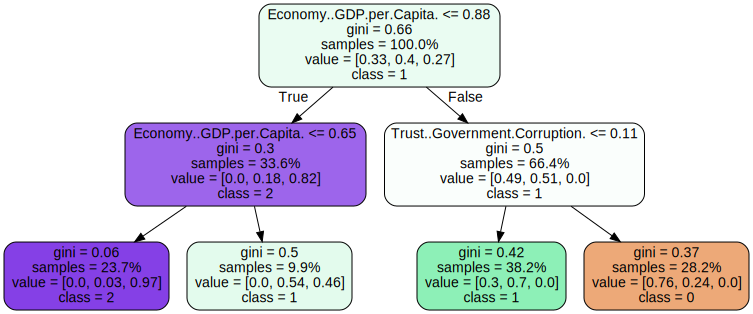

In [24]:
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = None,
                                  max_depth=1, min_samples_leaf=4, max_leaf_nodes=4,  min_samples_split=4,
                                  max_features=None, 
                                  presort=False,  splitter='random')

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=features,  
                                class_names=label_class,  
                                filled=True, rounded=True, 
                                leaves_parallel=False,
                                impurity=True,
                                proportion=True,
                                precision=2) 

graph = graphviz.Source(dot_data)  
graph 

Gini safsızlığı, alt kümedeki etiketlerin dağılımına göre rastgele etiketlendiğinde kümeden rastgele seçilen bir öğenin yanlış etiketlenmesinin ne sıklıkta bir ölçüsü olduğuna dair bir ölçektir. Samples ifadesi, veri setinden yüzde kaçlık kısmın o grupta yer aldığını gösterir. value ise grupta yer alan kümelerin oransal ifadesini verir. class alanı ise bölme işlemi sonucunda hangi grupta yer alındığını gösterir. 

random_state değerini 'None' olarak belirlediğimizden kodu her çalıştırmamızda bize farklı değerlere göre bölünmüş bir karar ağacı çizecektir. Fakat daha açık anlaışması için belirli bir örnek üzerinden gidelim. Örneğin, ilk yaprakta örnek verinin tamamı kullanılıyor ve Economy..GDP.per.Capita. değeri 1.04'ten küçük %50.4, büyük %49.6 kayıt var. Küçük olan kayıtlardan Economy..GDP.per.Capita. değeri 0.62'den küçük olanlar veri setinin %23.7'sini oluşturuyor ve bu kayıtlar 0, 1, 2 olarak adlandırdığımız kümelerden 2'de yer alıyor. Bu aşamada gini değeri artık 0 olduğundan bu aşamada yanlış etiketlenme söz konusu değildir.

Yukarıdakine benzer şekilde ağacı incelerken; yapraklarda yazan verileri göz önünde bulundurarak, veri setindeki kayıtların özelliklerine bakarak hangi kümeye dahil olacağı hakkında yorumlar yapmak mümkündür.

In [25]:
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using decision tree: ", round(score,1), "%" )

Accuracy using decision tree:  83.3 %


Yukarıda ise accuracy_score kullanarak yaptığımız işlemlerin doğru sonuç verme yüzdeliğini gösterebiliriz. y_test ve y_pred parametrelerinden yani oluşturduğumuz test ve tahmin değişkelerinden test için ayırdığımız veri kayıtları ne kadar başarılı tahmin edebiliyor sorusuna cevap bulabiliriz.

###### Kaynakça

- Zaki, Mohammed J. ve Meira Wagner Jr., Data Mining And Analysis, New York: Cambridge University Press, 2014. (Part Four: Classification, Decision Tree Classifier)
- - James G., Witten D., Hastie T., Tibshirani R., An Introduction to Statistical Learning, Springer, 2013. (8 Tree-Based Methods, 8.3 Lab: Decision Trees)
- https://pythonprogramminglanguage.com/decision-tree-visual-example/

# Hiyerarşik Kümeleme (Hierarchical Clustering) 

Hiyerarşik kümelemede, küme sayısı önceden belirlenmesi gerekmemektedir. 

İki tip hiyerarşik kümeleme yöntemi var: Agglomerative (yığınsal) ve Divisive (bölücü). Agglomerative yöntemde başlangıçta her nokta bir kümedir. Bu nokta, en yakınındaki noktaları toplayarak küçük kümeleri, daha sonra bu kümeler en yakınındaki diğer kümeleri toplayarak daha büyük kümeleri, en sonunda da bütün noktların dahil olduğu büyük tek küme oluşur. Agglomerative yöntemin aşamalarını şöyle sıralayabiliriz:

- Her bir noktayı bir küme ve küme merkezi olarak belirle
- Her bir nokta kendine en yakın iki noktayı alarak tek bir küme oluşturur.
- En yakın iki kümeyi alarak tek küme oluştur.
- Tek kümeye ulaşana kadar üçüncü adımı tekrarla.

Mesafe için burada iki nokta arasındaki mesafe ve iki küme arasındaki mesafe söz konusu. İki nokta arasındaki mesafeyi Öklid mesafesi hesabı ile bulunur. Dike kenar kareler toplamının karekökü işte. **Ancak kümeler arası mesafe nasıl ölçülecek? En yakın iki noktaya göre mi, en uzak iki noktaya göre mi yoksa küme merkezlerinin birbirine uzaklığına göre mi yoksa her küme elemanlarının birbirine olan uzaklığının ortalamasına göre mi? Bu seçim önemli çünkü sonucu çok etkiler. Aşağıda basit bir örnek üzerinden küme arası mesafeyi en yakın nokta kabul ederek göstermeye çalıştım.


Hiyerarşik kümelemede belirlenen adımlar uygulanırken her hareket kaydediliyor ve dendogram oluşturuluyor. dendogramda Y ekseni mesafeyi gösteriyor. X ekseninde ise dataframde bulunan her bir satırı temsil eden rakamlar mevcut. Her rakam saçılma diyagramındaki bir nokta ve dataframe deki x,y niteliklerinden oluşuyor. Dendogramın bacakları nokta veya kümelere bakar, üst çizgisi ise bacaklarda bulunan nokta veya kümeler arasındaki mesafenin Y eksenindeki izdüşümüdür. Dendogram bize küme sayısı hakkında bir fikir verir. Dendogramda optimal küme sayısını bulmak için bacak kesme operasyonu yapmalıyız. Yatay bir çizginin (dendogram üst çizgileri) kesmediği en uzun bacaktan yatay bir çizgi çekilir. Bu yatay çizgi kaç farklı bacak kesmiş ise küme sayısı olarak kesilen bacak sayısını kullanabiliriz.


###### Kaynakça

- Zaki, Mohammed J.  ve Meira Wagner Jr., Data Mining And Analysis, New York: Cambridge University Press, 2014. (Part Thre: Clustering, Hierarchical Clustering 
- James G., Witten D., Hastie T., Tibshirani R., An Introduction to Statistical Learning, Springer, 2013. (10.3 Clustering Methods, 10.3.2 Hierarchical Clustering)
- http://www.datascience.istanbul/2017/08/06/kumeleme-notlari-5-hiyerarsik-kumeleme/
- https://tr.linkedin.com/pulse/hiyerar%C5%9Fik-k%C3%BCmeleme-analizi-hc-ve-r-ile-datalab-tr


Bir sonraki adımda kullanacağımız fonksiyonlara, modüllere göz atalım.

- **scipy.cluster.hierarchy :** Hiyerarşik kümelenmeleri düz kümelere ayırır veya her gözlemin düz kümelenme kimliklerini sağlayarak bir grubun oluşturduğu ağacın köklerini bulur.
- **dendrogram :** Hiyerarşik kümelemeyi bir dendogram olarak çizer.
- **linkage :** Yoğun mesafe matrisi üzerinde hiyerarşik kümelemeyi gerçekleştirir.
- **leaf_rotation :** x ekseni etiketlerini döndürür.
- **leaf_font_size :** x ekseni etiketleri için yazı tipi boyutu
- **truncate_mode :** Dendrogram, bağlantının elde edildiği orijinal gözlem matrisi büyük olduğunda okunması zor olabilir. Trunkasyon dendrogramı yoğunlaştırmak için kullanılır. *lastp :* Bağlantıda oluşan son p tekli kümelenmeler, bağlantıdaki tek yapraksız düğümlerdir; Z'deki Z [n-p-2: end] satırlarına karşılık gelirler. Tüm diğer tek-kümelenmemiş kümeler yaprak düğümlerine aktarılır.
- **distance_sort :** Her düğüm için n, düzen (görsel olarak, soldan sağa) n'nin iki adet alttan bağlanan linki parametrelerle belirlenebilir. *ascending :* Direkt inişler arasındaki minimum mesafeye sahip olan çocuk önce çizilir.


###### Kaynakça

- https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

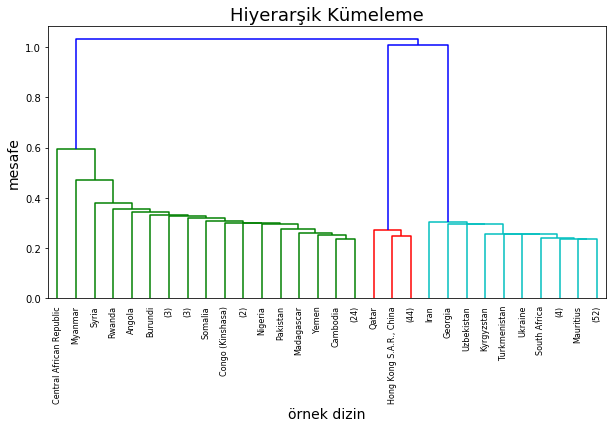

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 5))
plt.title('Hiyerarşik Kümeleme', fontsize=18)
plt.xlabel('örnek dizin', fontsize=14)
plt.ylabel('mesafe', fontsize=14)

Z = linkage(df2)
dendrogram(
    Z,
    labels=(dataset.iloc[:,0]).values,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    truncate_mode='lastp',
    distance_sort = 'ascending'
)

plt.show()

İstediğimiz forma dönüştürdüğümüz veri setimizi yukarıda df2 olarak tanımladık. df2'yi kullanarak veri setimizi 0, 1 ve 2 diye adlandırılan kümelere bölme işlemini gerçekleştirdik ve bunu bir  dendrogramda gösterdik. x ekseni üzerinde veri setimizdeki ülkeler yer alıyor. Tüm ülkeleri göremememizin sebebi ise lastp ile yaprakları olmaması gerekçesiyle son düğümleri çizdirmeyip onları diğer yaprak düğümlerine aktarmış olmamız.  155 ülkeyi dendogram üzerinde göstermek oldukça kalabalık ve kafa karıştırı olduğundan bu şekilde daha sade bir çizim gerçekleştirdik. y ekseni ise aralarındaki Öklid mesafesini gösteriyor. Öklid mesafesini hatırlamak gerekirse:

$$ d(i,j)= \sqrt{\sum_{k=1}^P(x_{ik} − x_{jk} )^2 } $$


Ayrıca bu grafiğe bakarak hangi ülkelerin birbirlerine benzedikleri hakkında yorum yapabiliriz. Öncelikle her renk grubu kendi içerisinde birbirine daha çok benzemekte. Daha detaylı örnek vermek gerekirse Nijerya, Pakistan, Madagaskar, Yemen birbirlerine daha çok; İran, Gürcistan, Özbekistan, Kırgızistan, Türkmenistan ise birbirlerine daha çok benzemekte. Bu dendrograma bakarak bir ülkenin diğer hangi ülkelere benzediğini söyleyebiliriz.

###### Kaynakça

- https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
- https://www.kaggle.com/hiramfoster/hierarchical-clustering-with-dendrograms
- https://plot.ly/python/dendrogram/
- https://stackoverflow.com/questions/29127013/plot-dendrogram-using-sklearn-agglomerativeclustering?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
- https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hierarchical_Clustering-Dendrograms.pdf   

# Sonuç

Veri setimizi analiz edebilmek için farklı yöntemler denedik. Öncelikle k-means algoritması ile veri setinde yer alan ülkeleri ilgili alanları göz önünde bulundurarak mutlu, orta ve mutsuz şeklinde üç kümeye ayırmaya çalıştık. K-means ile çok başarılı sonuç alamayınca doğrusal diskriminant analizi ile verimizi tekrar kümeledik. Veri setinde yer alan kolonların gerçekten de mutluluk üzerinde bir etkisi olduğunu göstermiş olduk. Mutluluk değerini etkileyen alanları kendi içerisinde inceledik. Bu alanların birbirleriyle ilişkilerini ve mutluluk değerine olan etkilerini araştırdık. En çok ekonomik durumun mutluluk üzerinde etkisi olduğu sonucunu çıkardık. İkinci bir yöntem olarak karar ağacı algoritmasını kullandık. k-means algoritmasında kümeleme işleminin neye göre, ne baz alınarak yapıldığını bilmiyorduk fakat karar ağacı ile bölünmelerin nasıl gerçekleştiğini ve bölünme sonucunda kümelerin hangi özelliklerine sahip olduğunu görebiliyoruz. Karar ağacından faydalanarak değerlerini bildiğimiz bir ülkeyi uygun kümeye yerleştirebiliriz. Son olarak ise hiyerarşik kümeleme yönteminden yararlandık. Burada da üç kümeye ayırdığımız veri setimizi bir dengrogram üzerinde gösterdik. Dendrograma bakarak hangi ülkelerin birbirlerine daha yakın oldukları sonucuna varabildik.  En kolay hiyerarşik kümeleme, en zor ise k-means yöntemini yaptık. Karar ağacı algoritması bize verdiği sonuçlar göz önünde bulundurulduğunda daha faydalı. Kümeleme işlemi yapılırken göz önünde bulundurulan kriterler ve kümeleme sonrası elde ettiğimiz bilgiler veriyi daha doğru yorumlamımızı sağlamakta.